# Exemple d'analyse d'un dataset : maisons à boston 

## Importations des librairies courantes

In [55]:
# Directive pour afficher les graphiques dans Jupyter (inutile si on utilise Spyder)
%matplotlib inline

In [56]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [57]:
#lecture du dataset
df = pd.read_csv("boston.csv")

In [58]:
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421   78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185   61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998   45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147   54.200001  6.0622    3  222   
5  0.02985   0.0   2.18     0  0.458  6.430   58.700001  6.0622    3  222   
6  0.08829  12.5   7.87     0  0.524  6.012   66.599998  5.5605    5  311   
7  0.14455  12.5   7.87     0  0.524  6.172   96.099998  5.9505    5  311   
8  0.21124  12.5   7.87     0  0.524  5.631  100.000000  6.0821    5  311   
9  0.17004  12.5   7.87     0  0.524  6.004   85.900002  6.5921    5  311   

          PT           B  LSTAT         MV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001  
5  18.700001  394.119995   5.21  28.700001  
6  15.200000  395.600006  12.43  22.900000  
7  15.200000  396.899994  19.15  27.100000  
8  15.200000  386.630005  29.93  16.500000  
9  15.200000  386.709992  17.10  18.900000

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


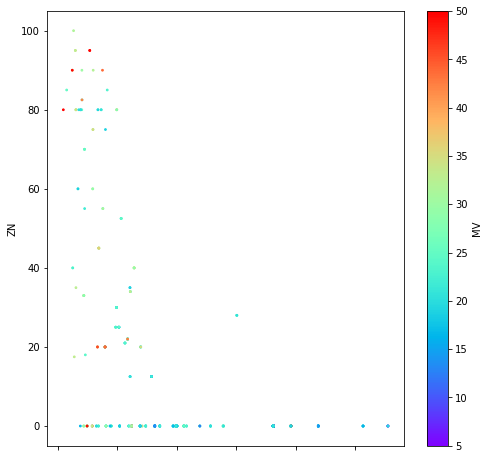

In [60]:
df[df.MV<70000].plot(kind="scatter", x="INDUS", y="ZN", c="MV", cmap="rainbow", s=3, figsize=(8,8))

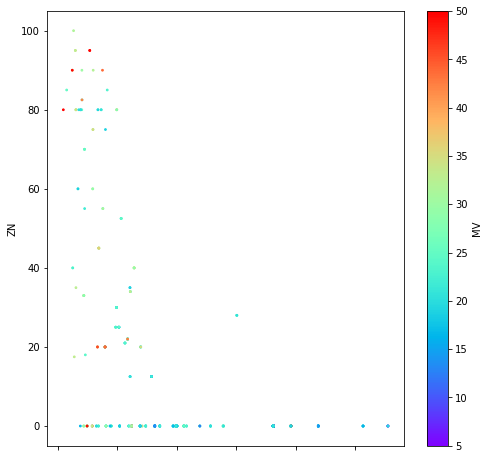

In [61]:
df[df.MV <8000].plot(kind="scatter", x="INDUS", y="ZN", c="MV", cmap="rainbow", s=3, figsize=(8,8))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [63]:
df.count()

CRIM     506
ZN       506
INDUS    506
CHAS     506
NOX      506
RM       506
AGE      506
DIS      506
RAD      506
TAX      506
PT       506
B        506
LSTAT    506
MV       506
dtype: int64

In [64]:
df['year'] = pd.DatetimeIndex(df['RAD']).year #année corespondant à la date
df['month'] = pd.DatetimeIndex(df['RAD']).month

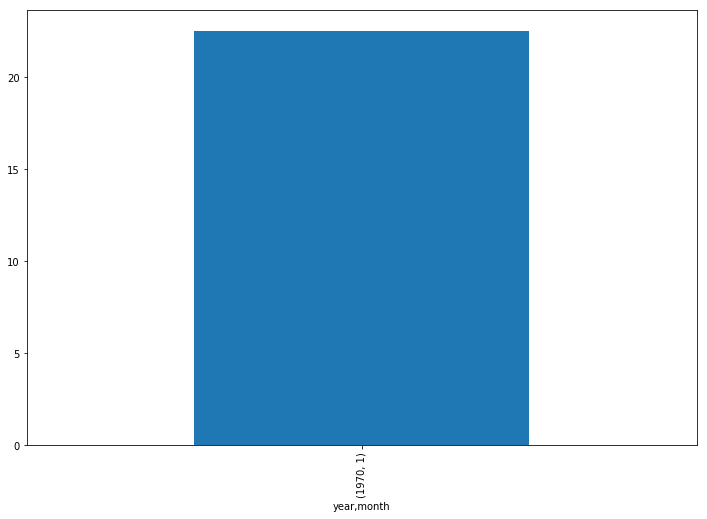

In [65]:
df.groupby(['year','month'])['MV'].mean().plot(kind = 'bar', figsize=(12,8))

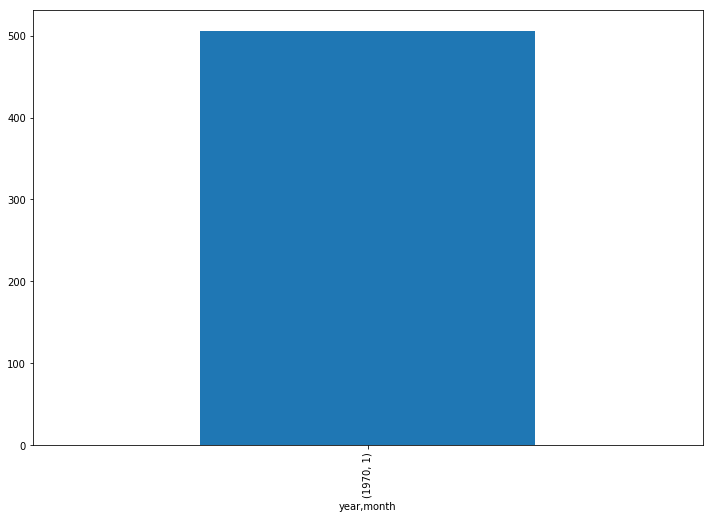

In [66]:
df.groupby(['year','month'])['MV'].count().plot(kind = 'bar', figsize=(12,8))

In [67]:
df = df.drop(['RAD'], axis=1) # supprime la colonne et 'RAD'

## Recherche de corrélations 

In [68]:
tabcorr = df.corr()     # on peut utiliser aussi bos.corr(method='pearson') par exemple

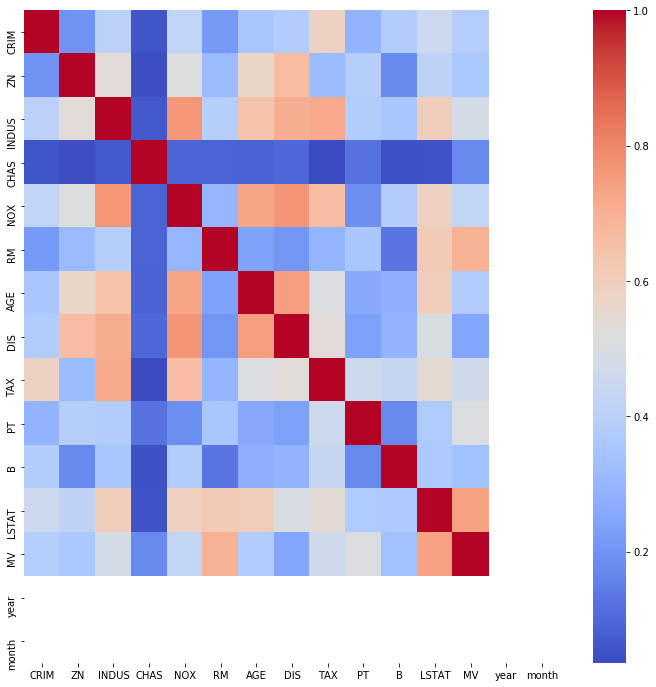

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

ValueError: The condensed distance matrix must contain only finite values.

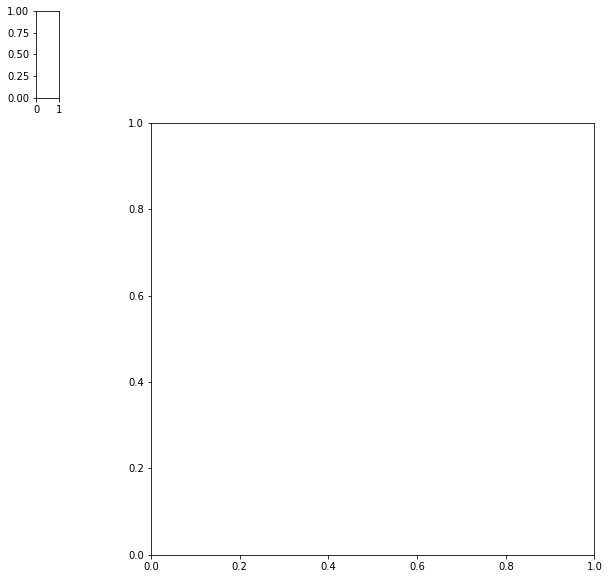

In [70]:
sns.clustermap(abs(tabcorr), cmap="coolwarm")